#### **1.1 Importing Data**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
warnings.filterwarnings(action = "ignore")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset-sample-transactions/Online Retail Data Set.xlsx


/opt/conda/lib/python3.10/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.10/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
# Importing data
rt_st_df = pd.read_excel(path)
rt_st_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#Exploring shape of imported dataframe:
rt_st_df.shape

(541909, 8)

In [4]:
rt_st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### **1.2 Data Cleaning**

In [5]:
#Checking Null records in each column:
rt_st_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### This analysis is focused in carrying out customer segmentation and market basket analysis.The null records in customer ID and Description can adversely affect the result of our analysis and it is necessary to remove them.

In [6]:
rt_st_df.dropna(inplace=True)
print("The number of rows after dropping Null records is",rt_st_df.shape[0])

The number of rows after dropping Null records is 406829


In [7]:
#Checking Duplicate Records
print("Number of duplicates in the data is",rt_st_df.duplicated().sum())
rt_st_df[rt_st_df.duplicated()].head()

Number of duplicates in the data is 5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [8]:
rt_st_df.loc[rt_st_df["StockCode"] == 21866]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
12236,537371,21866,UNION JACK FLAG LUGGAGE TAG,8,2010-12-06 12:47:00,1.25,15028.0,United Kingdom
12869,537399,21866,UNION JACK FLAG LUGGAGE TAG,3,2010-12-06 14:31:00,1.25,13030.0,United Kingdom
12942,537403,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-06 14:43:00,1.25,17191.0,United Kingdom
...,...,...,...,...,...,...,...,...
517672,580074,21866,UNION JACK FLAG LUGGAGE TAG,12,2011-12-01 14:06:00,1.25,15028.0,United Kingdom
525707,580635,21866,UNION JACK FLAG LUGGAGE TAG,2,2011-12-05 12:30:00,1.25,14649.0,United Kingdom
527644,580727,21866,UNION JACK FLAG LUGGAGE TAG,1,2011-12-05 17:17:00,2.46,14096.0,United Kingdom
534838,581173,21866,UNION JACK FLAG LUGGAGE TAG,1,2011-12-07 15:07:00,1.25,17870.0,United Kingdom


#### The sample data shows that the same transaction was done twice. Now there are 2 possibilities. 
#### 1.The customer might have bought the same item twice.
#### 2.There might be some error in POS machine that it recorded this transaction twice. 
#### Here I am assuming that all duplicates records are due to some error in POS machine. Thus will drop this duplicated transactions.

In [9]:
rt_st_df.drop_duplicates(keep="first",inplace=True)
print("Number of records after dropping duplicates is",rt_st_df.shape[0])

Number of records after dropping duplicates is 401604


In [10]:
#Looking for columns where Quantity < 0
rt_st_df[rt_st_df['Quantity']<0].head()
print("Looking at the data it seems these items were either returned by customer or they are given as a discount. Thus it is better to drop these records from analysis")

Looking at the data it seems these items were either returned by customer or they are given as a discount. Thus it is better to drop these records from analysis


In [11]:
rt_st_df = rt_st_df[rt_st_df['Quantity'] > 0]
print("Number of records after removing records where Quantity < 0 is",rt_st_df.shape[0])

Number of records after removing records where Quantity < 0 is 392732


In [12]:
# Looking for rows where Unit Price 
print("Number of records where Unit Price < 0 is",rt_st_df[rt_st_df['UnitPrice']<0].shape[0])

Number of records where Unit Price < 0 is 0


In [13]:
# Looking for records where Unit Price is 0
print("Number of records where Unit Price equals 0 is",rt_st_df[rt_st_df['UnitPrice']==0].shape[0])
rt_st_df[rt_st_df['UnitPrice'] == 0].head()

Number of records where Unit Price equals 0 is 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


#### These records seems like customer may be given gift or there may be error in POS system. As the count for such rows is less,it is better to drop them.

In [14]:
rt_st_df = rt_st_df[rt_st_df['UnitPrice']> 0]
print("Number of records after removing records where Unit Price = 0 is",rt_st_df.shape[0])

Number of records after removing records where Unit Price = 0 is 392692


In [15]:
def unique_count(x):
    print(f"\n Number unique {x} is {rt_st_df[x].nunique()}")
unique_count("InvoiceNo")
unique_count("StockCode")
unique_count("Description")
unique_count("CustomerID")


 Number unique InvoiceNo is 18532

 Number unique StockCode is 3665

 Number unique Description is 3877

 Number unique CustomerID is 4338


In [16]:
# Above unique counts shows number of Description is greater than Stock Code. Need to Investigate this difference
Des_Stk_Code_df = rt_st_df.groupby(by = ["Description","StockCode"])['Quantity'].count().reset_index()
Stk_Code_df = Des_Stk_Code_df.groupby("StockCode")['Description'].count().reset_index()
stk_code = Stk_Code_df[Stk_Code_df.Description > 1]["StockCode"]    
filtered_Des_Stk_Code_df = Des_Stk_Code_df[Des_Stk_Code_df['StockCode'].isin(stk_code)]
filtered_Des_Stk_Code_df["StockCode"] = pd.to_numeric(filtered_Des_Stk_Code_df["StockCode"], errors='coerce')
filtered_Des_Stk_Code_df.sort_values(by = "StockCode").head()

,Description,StockCode,Quantity
3647,VIPPASSPORT COVER,20622.0,21
3646,VIP PASSPORT COVER,20622.0,11
1951,LUNCH BAG RED SPOTTY,20725.0,1
1950,LUNCH BAG RED RETROSPOT,20725.0,1303
3151,SET/5 RED RETROSPOT LID GLASS BOWLS,20914.0,773


#### The above results shows that for stock code 20622, the description is different in terms of minor spelling mismatch. Eventually both records represent same item. Thus will replace all such description with mode of the description for given Stock Code.

In [17]:
grouped_data = rt_st_df.groupby('StockCode')['Description']
# Use agg to find the mode within each group
mode_per_group = grouped_data.agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Display the resulting Series
print(mode_per_group)
mode_per_group = mode_per_group.reset_index()
rt_st_df[rt_st_df["StockCode"].isin(mode_per_group["StockCode"])]["Description"] = mode_per_group.Description

StockCode
10002     INFLATABLE POLITICAL GLOBE 
10080        GROOVY CACTUS INFLATABLE
10120                    DOGGY RUBBER
10125         MINI FUNKY DESIGN TAPES
10133    COLOURING PENCILS BROWN TUBE
                     ...             
C2                           CARRIAGE
DOT                    DOTCOM POSTAGE
M                              Manual
PADS       PADS TO MATCH ALL CUSHIONS
POST                          POSTAGE
Name: Description, Length: 3665, dtype: object


#### Description column is cleaned and difference in its value is replaced by mode of the value for each stockCode

In [18]:
print('The data statistics after cleaning:')
rt_st_df.info()

The data statistics after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


### 

In [19]:
#Lets look into period when this data was recorded
print(f'The retail store data is capture from {rt_st_df.InvoiceDate.min()} to {rt_st_df.InvoiceDate.max()}')

The retail store data is capture from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


#### 8 days of additional data for month of december is captured. Its is a good practice to drop these records because they might cause issues while analysing seasonal trends.

In [20]:
rt_st_df = rt_st_df[rt_st_df.InvoiceDate < pd.to_datetime('2011-12-01')]

#### **1.3 Exploratory Data Analysis**

In [21]:
rt_st_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,375666.000000,375666,375666.000000,375666.000000
mean,12.950932,2011-07-04 02:27:30.958777088,3.143648,15286.835391
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-01 13:20:00,1.250000,13952.000000
50%,6.000000,2011-07-20 14:54:00,1.950000,15152.000000
75%,12.000000,2011-10-12 12:19:00,3.750000,16790.000000
max,74215.000000,2011-11-30 17:37:00,8142.750000,18287.000000
std,128.536730,NaN,22.575384,1713.016520


In [22]:
#Defining a new feature Amount(Revenue) = Quantity * Unit Price
rt_st_df['Amount'] = rt_st_df['Quantity'] * rt_st_df['UnitPrice']

In [23]:
rt_st_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Exploring trends in terms of Number of Items purchased and Revenue Genereated through out the year

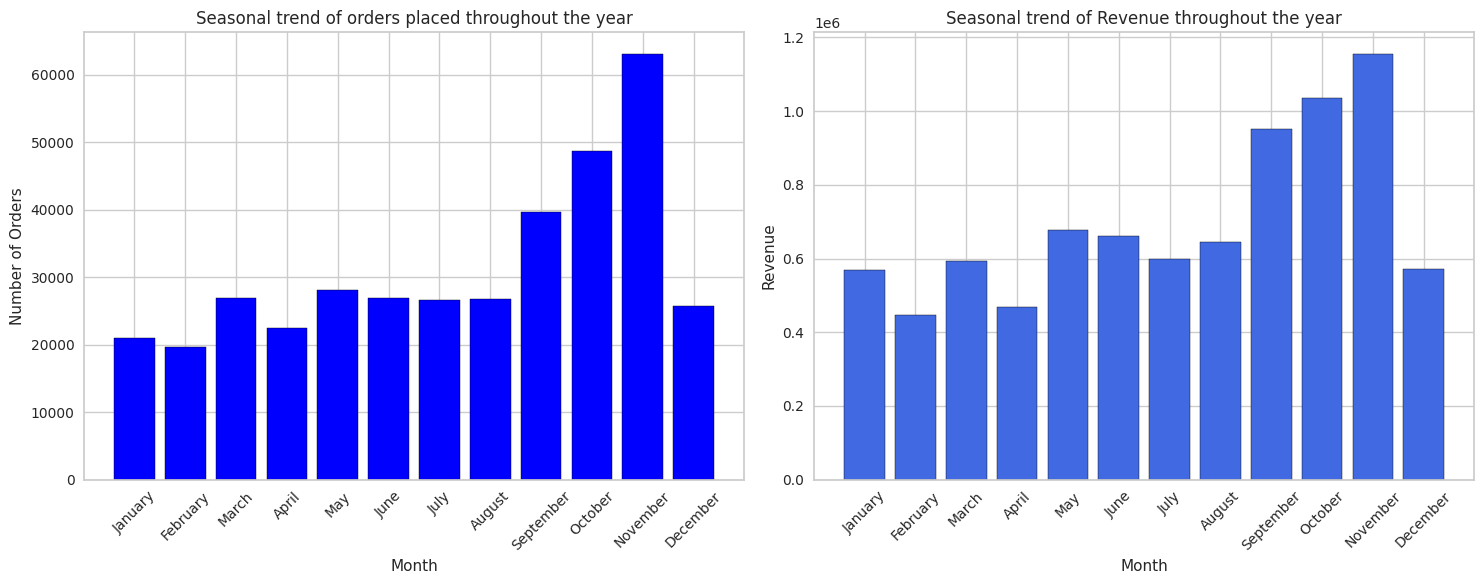

In [24]:
rt_st_df['month_name'] = rt_st_df['InvoiceDate'].dt.strftime('%B')
# Specify the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'month_name' to categorical with the specified order
rt_st_df['month_name'] = pd.Categorical(rt_st_df['month_name'], categories=month_order, ordered=True)

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Number of Orders
agg_df = rt_st_df.groupby('month_name')['InvoiceNo'].count().reset_index()
ax[0].bar(x=agg_df['month_name'], height=agg_df["InvoiceNo"], align='center', color="blue", edgecolor="black")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Number of Orders")
ax[0].set_title("Seasonal trend of orders placed throughout the year")
ax[0].tick_params(axis='x', rotation=45)  # Rotate labels

# Plot Revenue
agg_df = rt_st_df.groupby('month_name')['Amount'].sum().reset_index()
ax[1].bar(x=agg_df['month_name'], height=agg_df["Amount"], align='center', color="royalblue", edgecolor="black")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Revenue")
ax[1].set_title("Seasonal trend of Revenue throughout the year")
ax[1].tick_params(axis='x', rotation=45)  # Rotate labels

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show()

#### The trend of Number of Orders place and Revenue is identical. It shows that the Revenue for the store is highest in month of November. The reason for that is people buy gifts for christmas during November. However, the revenue drops in month of december because the store remain close for a week or two due to christmas break.

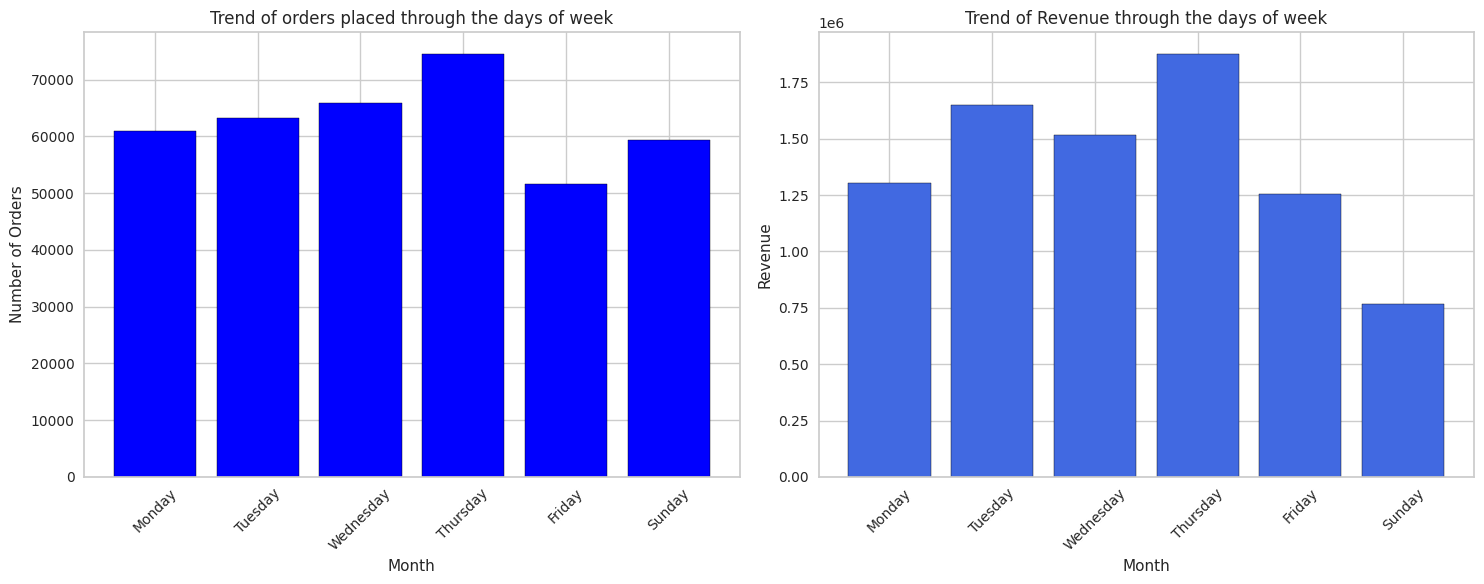

In [25]:
rt_st_df['day_of_week'] = rt_st_df['InvoiceDate'].dt.day_name()
# Specify the order of days
day_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Sunday']
# Convert 'day_of_week' to categorical with the specified order
rt_st_df['day_of_week'] = pd.Categorical(rt_st_df['day_of_week'], categories=day_order, ordered=True)
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Plot Number of Orders
agg_df = rt_st_df.groupby('day_of_week')['InvoiceNo'].count().reset_index()
ax[0].bar(x=agg_df['day_of_week'], height=agg_df["InvoiceNo"], align='center', color="blue", edgecolor="black")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Number of Orders")
ax[0].set_title("Trend of orders placed through the days of week")
ax[0].tick_params(axis='x', rotation=45)  # Rotate labels

# Plot Revenue
agg_df = rt_st_df.groupby('day_of_week')['Amount'].sum().reset_index()
ax[1].bar(x=agg_df['day_of_week'], height=agg_df["Amount"], align='center', color="royalblue", edgecolor="black")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Revenue")
ax[1].set_title("Trend of Revenue through the days of week")
ax[1].tick_params(axis='x', rotation=45)  # Rotate labels

# Adjust layout to prevent clipping of rotated labels
plt.tight_layout()

# Show the plot
plt.show()

#### On Thrusday the store faces highest amount of orders. While on Sunday the number of order place dropped.Using this trend, store can carryout essential staff and inventory planning. 

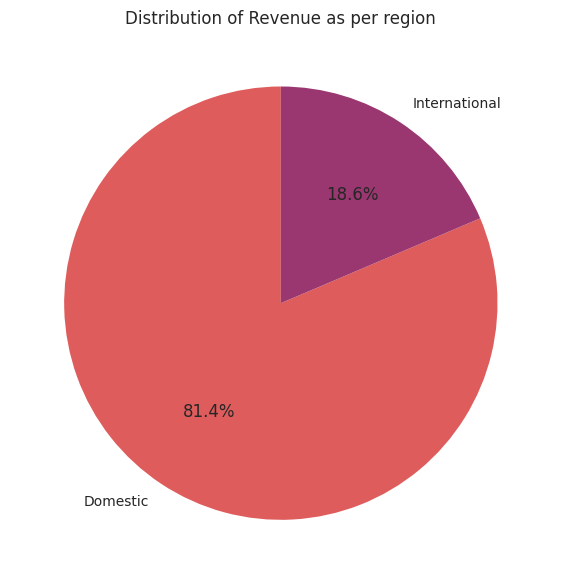

In [26]:
# Count the occurrences of each category
df_agg = rt_st_df.groupby('Country')['Amount'].sum().reset_index()
df_agg.loc[df_agg['Country'] == 'United Kingdom','Region'] = 'Domestic'
df_agg.loc[df_agg['Country'] != 'United Kingdom','Region'] = 'International'
df_agg.drop(columns = 'Country',inplace = True)
df_agg = df_agg.groupby('Region').sum().reset_index()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_agg['Amount'], labels=df_agg['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('flare', len(df_agg['Region'])))

# Set the title
plt.title('Distribution of Revenue as per region')
plt.tight_layout()

#### The store is earning about 81.4% revenue by domestic sales. 

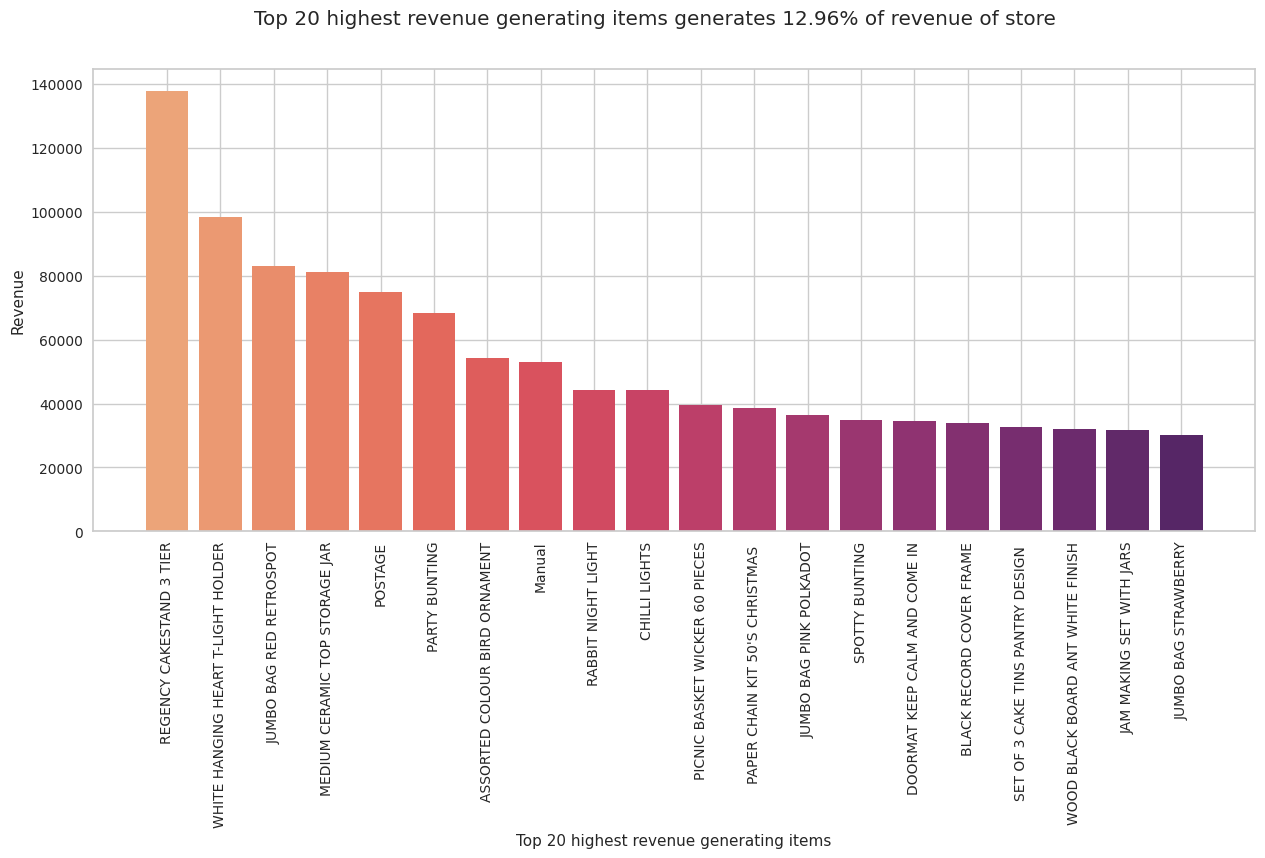

In [27]:
hot_stock_list = rt_st_df.groupby(['StockCode','Description'])['Amount'].sum().reset_index().sort_values(by = 'Amount',ascending=False)
total_revenue = hot_stock_list.Amount.sum()
total_stock_items = hot_stock_list.StockCode.count()
#Visualizing revenue by top 20 items
top_20_stock_item = hot_stock_list[:20]
plt.figure(figsize=(15,6))
plt.bar(top_20_stock_item['Description'],top_20_stock_item['Amount'],color=sns.color_palette('flare', len(top_20_stock_item['Description'])))
plt.suptitle(f'Top 20 highest revenue generating items generates {round((top_20_stock_item.Amount.sum()/total_revenue)*100,2)}% of revenue of store')
plt.xlabel('Top 20 highest revenue generating items')
plt.ylabel('Revenue')
plt.tick_params(axis='x',rotation = 90)

#### This are the most essential items for our store. It is necessary to ensure that these items are in stock at our store all the time.

#### 1.4 Market Basket Analysis

Market Basket Analysis, often employed in retail and e-commerce, is a technique used to identify associations and patterns in customer purchasing behavior. The Apriori Algorithm is a widely used method in this analysis. It operates by identifying frequent itemsets, which are combinations of items frequently bought together.

The algorithm establishes a set of rules, particularly association rules, which indicate the likelihood of one product being purchased when another is. Key metrics such as support, confidence, and lift are used to evaluate the strength of these rules. Support measures the frequency of occurrence of itemsets, confidence gauges the likelihood of buying a consequent item given the purchase of an antecedent item, and lift indicates how much more likely the purchase of the consequent item is when compared to random chance. Please find below the defination of these key metrics:

* Support measures the proportion of transactions in a dataset that contain a particular itemset.

  Support(X) = Transactions containing X / Total transactions
 
* Confidence measures the probability of the occurrence of a consequent item given the presence of an antecedent item in a transaction.

  Confidence(X -> Y) = Support(X ∪ Y) / Support(X)

 
* Lift indicates the degree to which the occurrence of a consequent item is dependent on the presence of an antecedent item, compared to the scenario where there is   no dependency.

  Lift(X -> Y) = Confidence(X -> Y) / Support(Y)
 
In these equations:

X and Y represent sets of items (itemsets).
∪ denotes the union of sets.
Support(X ∪ Y) is the support of the combined itemset X ∪ Y.
Support(X) is the support of itemset X.
Support(Y) is the support of itemset Y.


If the rule had a lift of 1, it would imply that the probability of occurrence of the antecedent and that of the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.
If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.
If the lift is < 1, that lets us know the items are substitute to each other. This means that presence of one item has negative effect on presence of other item and vice versa.

In essence, Market Basket Analysis with the Apriori Algorithm provides valuable insights into product relationships, enabling businesses to make informed decisions about product placement, promotions, and personalized recommendations. This strategic utilization of data can significantly enhance the customer shopping experience and contribute to increased sales and revenue.

In [28]:
# Dividing each Invoice on the basis of Description.
market_basket_df = (rt_st_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
# Apply one-hot encoding using pandas directly
market_basket_encoded_df = market_basket_df.apply(lambda x: (x > 0).astype(int))
market_basket_df = market_basket_encoded_df
market_basket_support_items = apriori(market_basket_df, min_support = 0.015, use_colnames = True) # Used minimum support threshold of 0.015 to filter out frequent itemset.
# Itemsets in the descending order based on their support.
market_basket_support_items.sort_values(by=['support'], ascending=False)
# Applying Association Rule and sorting in descending order on the basis of "Confidence" and "Lift".
market_basket_association_rule = association_rules(market_basket_support_items, metric ="lift", min_threshold = 1) #If lift of basket items > 1 then only you can confidently say that both items are associated(dependent).
market_basket_association_rule = market_basket_association_rule.sort_values(['confidence', 'lift'], ascending =[False, False])

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [29]:
market_basket_association_rule.iloc[:,:-1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
174,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023826,0.037907,0.021347,0.895981,23.636327,0.020444,9.249213
175,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.025177,0.043033,0.021347,0.847875,19.703099,0.020264,6.290654
181,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.020390,0.043033,0.017010,0.834254,19.386581,0.016133,5.773704
26,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030247,0.037907,0.025177,0.832402,21.959093,0.024031,5.740489
154,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030247,0.043033,0.023826,0.787709,18.304967,0.022524,4.507820
...,...,...,...,...,...,...,...,...,...
78,(JUMBO BAG RED RETROSPOT),(RED RETROSPOT CHARLOTTE BAG),0.087811,0.040498,0.015264,0.173829,4.292304,0.011708,1.161385
72,(JUMBO BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.087811,0.057452,0.015095,0.171905,2.992159,0.010050,1.138213
168,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.108145,0.048102,0.016841,0.155729,3.237489,0.011639,1.127480
34,(WHITE HANGING HEART T-LIGHT HOLDER),(HEART OF WICKER LARGE),0.108145,0.043877,0.015715,0.145312,3.311782,0.010970,1.118681


#### The results of the Market Basket Analysis reveal strong connections between items. Given that our business is an e-commerce platform, leveraging these associations during a customer's online shopping experience is strongly advised. Recommending consequent items when a customer purchases an antecedent item can significantly increase the likelihood of selling additional products, leading to a substantial boost in revenue for our online store.

#### 1.5 Customer Churn Analysis

RFM Analysis (Recency, Frequency, Monetary) is a customer segmentation technique commonly used in retail and e-commerce to understand and categorize customers based on their purchasing behavior. Here's a summary explanation:

Recency (R): This refers to how recently a customer has made a purchase. It's a measure of the time since the last transaction. Customers who have made a purchase more recently are considered more valuable.

Frequency (F): This measures how often a customer makes a purchase. It is the total number of transactions within a specific time period. Customers with a higher frequency are often more engaged and loyal.

Monetary (M): This represents the total monetary value of a customer's purchases. It's a measure of the total amount spent by a customer within a specific time frame. Customers with higher monetary values are typically high spenders.

#### RFM Analysis

In [30]:
# For RFM analysis I consider latest transaction date  + 1 day as day of analysis. 
day_of_analysis = rt_st_df.InvoiceDate.max() + timedelta(days = 1)
rt_st_RFM_df = rt_st_df.groupby("CustomerID").agg({
                                        "InvoiceNo" : "count",
                                        "Amount" : "sum",
                                        "InvoiceDate":"max"
                        }).reset_index()

In [31]:
rt_st_RFM_df['Recency'] = day_of_analysis - rt_st_RFM_df['InvoiceDate']

In [32]:
rt_st_RFM_df['Recency'] = rt_st_RFM_df['Recency'].astype(str)
rt_st_RFM_df['Recency'] = rt_st_RFM_df['Recency'].apply(lambda x: re.search('\d+',x).group())
rt_st_RFM_df['Recency']= rt_st_RFM_df['Recency'].astype(int)
rt_st_RFM_df.drop(columns = 'InvoiceDate',inplace=True)
rt_st_RFM_df.columns = ['CustomerID','Frequency','Monetary','Recency']
rt_st_RFM_df

<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
/tmp/ipykernel_19/2048611080.py:2: DeprecationWarning: invalid escape sequence '\d'
  rt_st_RFM_df['Recency'] = rt_st_RFM_df['Recency'].apply(lambda x: re.search('\d+',x).group())


,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.60,317
1,12347.0,171,4085.18,31
2,12348.0,31,1797.24,67
3,12349.0,73,1757.55,10
4,12350.0,17,334.40,302
...,...,...,...,...
4292,18280.0,10,180.60,269
4293,18281.0,7,80.82,172
4294,18282.0,7,100.21,118
4295,18283.0,671,1837.53,1


In [33]:
#Calculating outliers for each of above feature
rfm_cols = ['Recency','Frequency','Monetary']
outlier_df = rt_st_RFM_df[rfm_cols].quantile(q = [0.25,0.5,0.75]).T
outlier_df.columns = ['Q1','Q2','Q3']
outlier_df['lower_limit'] = outlier_df['Q1'] - 1.5*(outlier_df['Q3'] - outlier_df['Q1'])
outlier_df['upper_limit'] = outlier_df['Q3'] + 1.5*(outlier_df['Q3'] - outlier_df['Q1'])
outlier_df['num_of_outliers'] = ((rt_st_RFM_df[rfm_cols] < outlier_df['lower_limit']) | (rt_st_RFM_df[rfm_cols] > outlier_df['upper_limit'])).sum()
outlier_df['percent_outliers(%)'] = round(outlier_df['num_of_outliers']/rt_st_RFM_df.shape[0] * 100,2)
outlier_df

,Q1,Q2,Q3,lower_limit,upper_limit,num_of_outliers,percent_outliers(%)
Recency,16.00,50.00,146.00,-179.000,341.000,124,2.89
Frequency,17.00,40.00,96.00,-101.500,214.500,371,8.63
Monetary,303.16,650.75,1594.23,-1633.445,3530.835,424,9.87


#### These seems like a specific class of customers rather than outliers. So I decided not to drop them.

In [34]:
rt_st_RFM_df['RecencyBucket'] = pd.qcut(rt_st_RFM_df['Recency'],4,labels=[4,3,2,1]) # Here I have kept decesding order of labels. Higher the label more valuable the customer is.
rt_st_RFM_df['RecencyBucket'] = pd.to_numeric(rt_st_RFM_df['RecencyBucket'])
rt_st_RFM_df['FrequencyBucket'] = pd.qcut(rt_st_RFM_df['Frequency'],4,labels=[1,2,3,4])
rt_st_RFM_df['FrequencyBucket'] = pd.to_numeric(rt_st_RFM_df['FrequencyBucket'])
rt_st_RFM_df['MonetaryBucket'] = pd.qcut(rt_st_RFM_df['Monetary'],4,labels=[1,2,3,4])
rt_st_RFM_df['MonetaryBucket'] = pd.to_numeric(rt_st_RFM_df['MonetaryBucket'])
rt_st_RFM_df['OverallScore'] = rt_st_RFM_df['RecencyBucket'] + rt_st_RFM_df['FrequencyBucket'] + rt_st_RFM_df['MonetaryBucket']
rt_st_RFM_df['CustomerSegment'] = pd.cut(rt_st_RFM_df['OverallScore'],bins=[0, 3, 6, 10, 12],labels = ["Bronze","Silver","Gold","Platinum"]) # Segmenting Customers into 4 groups: Platinum, Gold, Silver and Bronze
rt_st_RFM_df['CustomerSegment'] = rt_st_RFM_df['CustomerSegment'].astype(str)
rt_st_RFM_df['Interval'] =  pd.cut(rt_st_RFM_df['OverallScore'],bins=[0, 3, 6, 10, 12])
rt_st_RFM_df.head()

,CustomerID,Frequency,Monetary,Recency,RecencyBucket,FrequencyBucket,MonetaryBucket,OverallScore,CustomerSegment,Interval
0,12346.0,1,77183.60,317,1,1,4,6,Silver,"(3, 6]"
1,12347.0,171,4085.18,31,3,4,4,11,Platinum,"(10, 12]"
2,12348.0,31,1797.24,67,2,2,4,8,Gold,"(6, 10]"
3,12349.0,73,1757.55,10,4,3,4,11,Platinum,"(10, 12]"
4,12350.0,17,334.40,302,1,1,2,4,Silver,"(3, 6]"


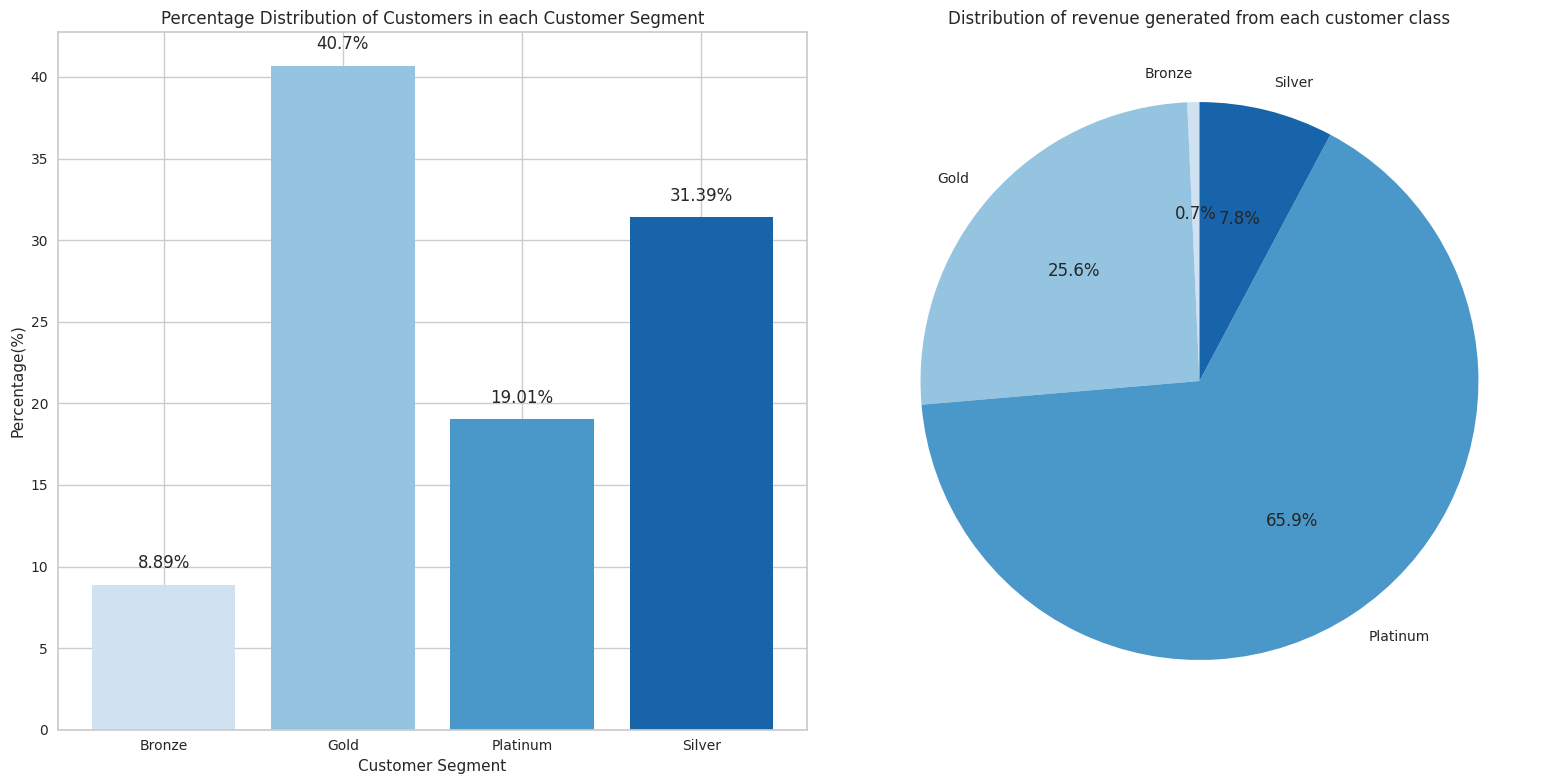

In [35]:
cust_seg_df = rt_st_RFM_df.groupby('CustomerSegment').agg({'CustomerID':'count',
                                                           'Monetary':'sum'}).reset_index()
total_customers = cust_seg_df.CustomerID.sum()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].bar(x=cust_seg_df['CustomerSegment'],height = round(cust_seg_df['CustomerID']/total_customers * 100,2),color=sns.color_palette('Blues', len(cust_seg_df['CustomerSegment'])))
ax[0].set_xlabel('Customer Segment')
ax[0].set_ylabel('Percentage(%)')
ax[0].set_title('Percentage Distribution of Customers in each Customer Segment')
# Bar graph with data labels
for i, value in enumerate(round(cust_seg_df['CustomerID'] / total_customers * 100, 2)):
    ax[0].text(i, value + 1, f'{value}%', ha='center')
ax[1].pie(x = cust_seg_df['Monetary'], labels=cust_seg_df['CustomerSegment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues', len(cust_seg_df['CustomerSegment'])))
ax[1].set_title('Distribution of revenue generated from each customer class')
plt.tight_layout()


* #### Customers in the Platinum group hold significant value for our business. They exhibit high frequency and monetary spending, coupled with low recency, making them exceptionally valuable. To express our appreciation and foster loyalty, special incentives and rewards are reserved for these esteemed customers. Platinum Group (19.01% customers) generate 65.9% percent of our revenue.
* #### Our Gold-tier customers showcase strong loyalty to our business, consistently making frequent purchases. In acknowledgment of their commitment, they are eligible for exclusive discounts on their item purchases. Gold Group (40.7% customers) generate 25.6% of our revenue.
* #### The Silver-tier customers, characterized by infrequent purchasing behavior,predominantly consist of small-scale business owners.Introduce a loyalty program that rewards them for each purchase, encouraging repeat business. Silver Group (31.3% customers) generate 7.8% of our revenue
* #### The Bronze-tier customers have shown a higher likelihood of churning.To proactively address this situation, the marketing department can offer enticing and personalized incentives to retain this group of customers. Implementing targeted campaigns with exclusive and lucrative offers can significantly contribute to retaining their loyalty and preventing churn. Bronze Group (8.89% customers) generate 0.7% of our revenue. 

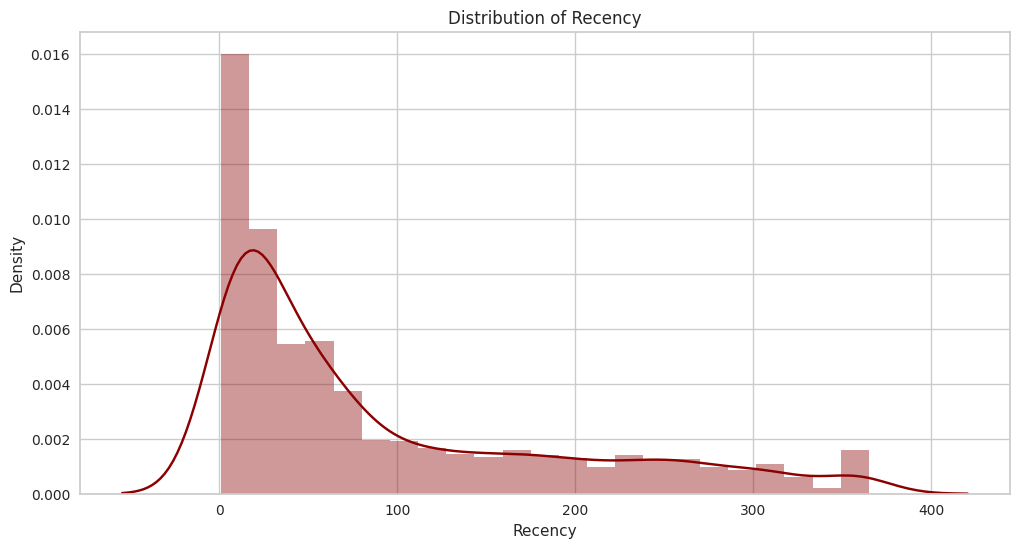

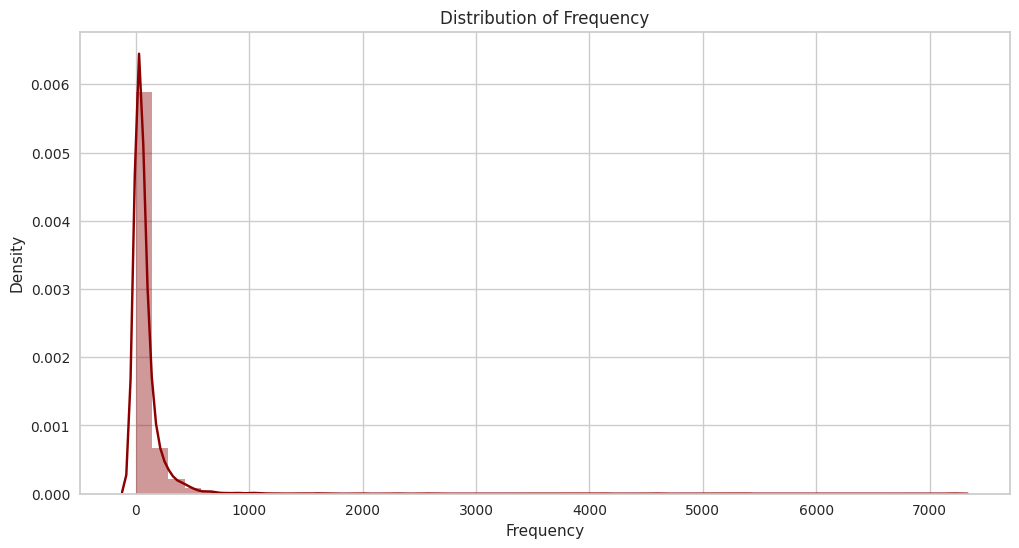

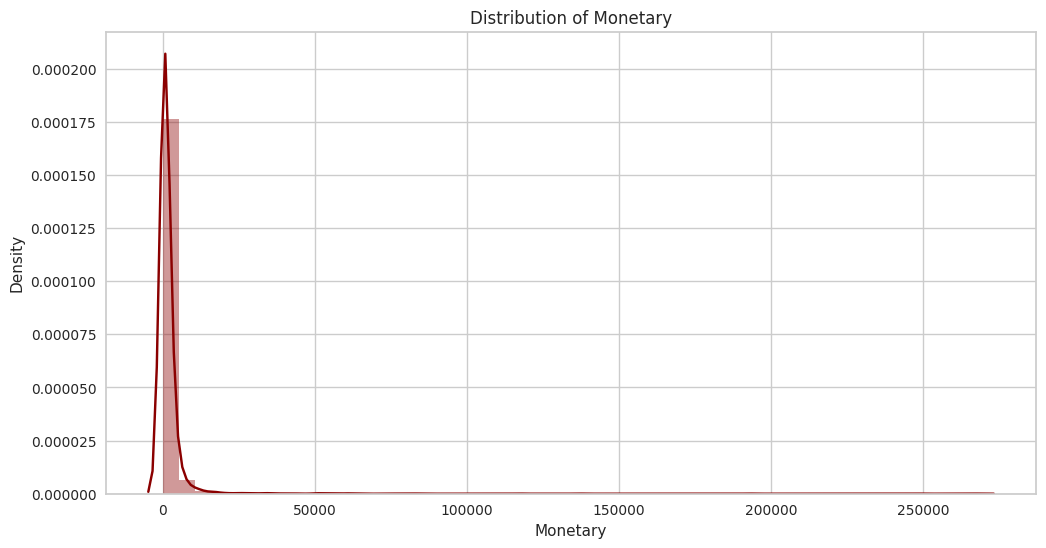

In [36]:
# Let us explore distribution of recency, frequency and monetary for our customers
def histplot(x):
    plt.figure(figsize=(12,6))
    sns.distplot(rt_st_RFM_df[x],color="darkred")
    plt.title(f'Distribution of {x}')
histplot('Recency')
histplot('Frequency')
histplot('Monetary')

#### The distribution of Recency, Frequency and Monetary is left skewed. The range(spread) of data is also high. Thus we need to convert data into log scale.

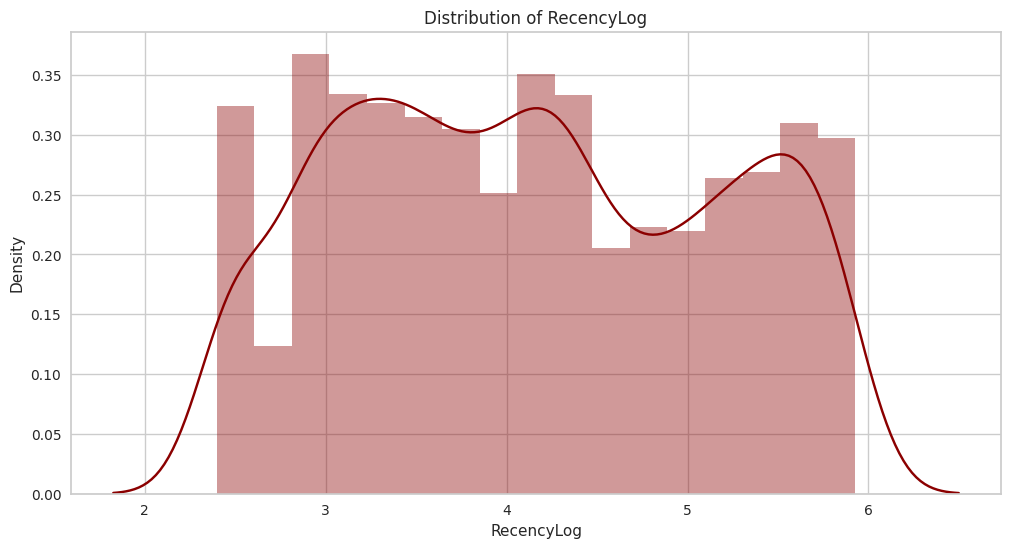

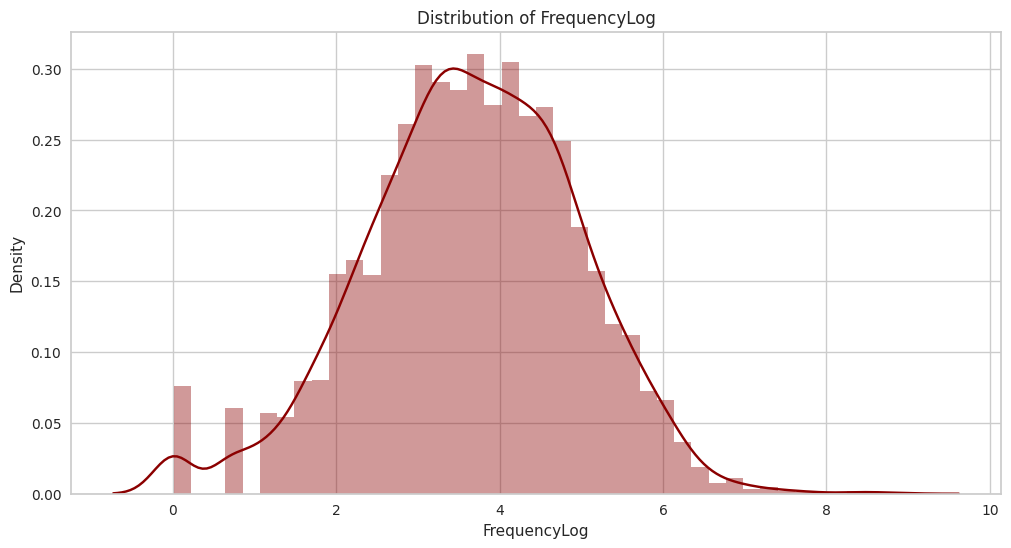

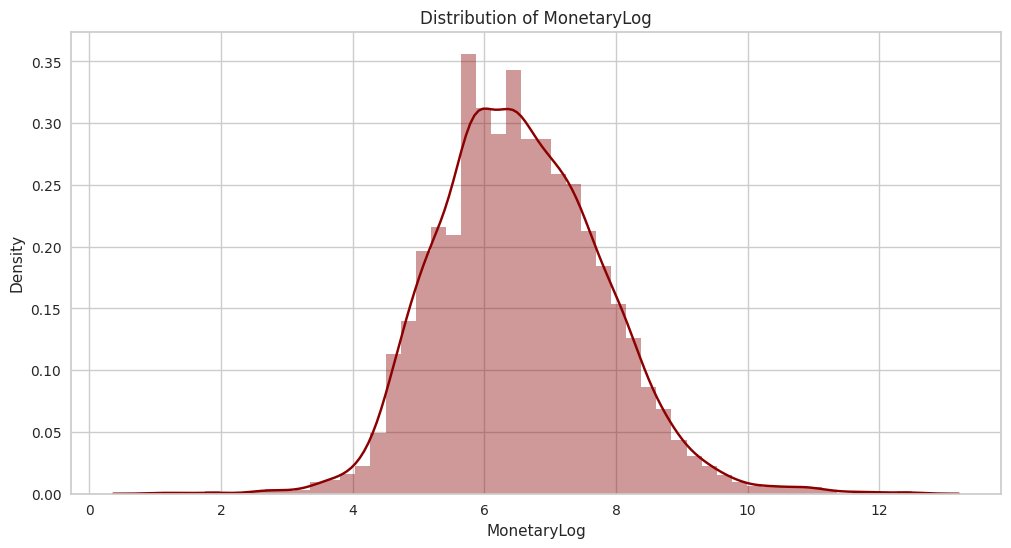

In [37]:
rt_st_RFM_df['RecencyLog'] = np.log(rt_st_RFM_df['Recency']+10) # avoiding 0 value because log 0 is -infinity
rt_st_RFM_df['FrequencyLog'] = np.log(rt_st_RFM_df['Frequency']+0.01)
rt_st_RFM_df['MonetaryLog'] = np.log(rt_st_RFM_df['Monetary']+0.01)
histplot('RecencyLog')
histplot('FrequencyLog')
histplot('MonetaryLog')

#### The distribution of Frequency and Monetary is almost Normal on Log Scale.

<Figure size 1600x400 with 0 Axes>

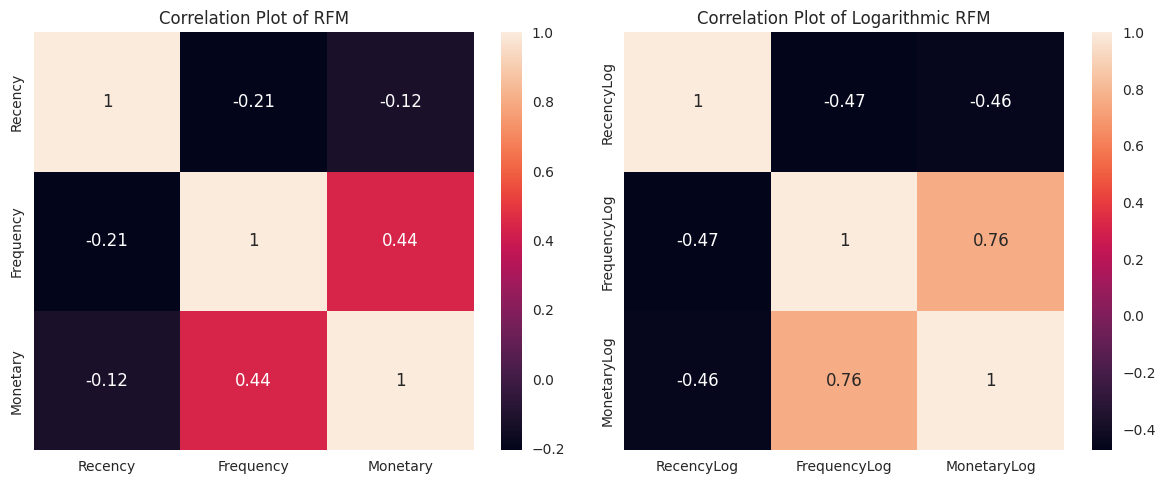

In [38]:
plt.figure(figsize=(16,4))
fig,ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(rt_st_RFM_df[['Recency', 'Frequency', 'Monetary']].corr(), annot = True, cmap="rocket",ax=ax[0])
ax[0].set_title("Correlation Plot of RFM")
sns.heatmap(rt_st_RFM_df[['RecencyLog', 'FrequencyLog', 'MonetaryLog']].corr(), annot = True, cmap="rocket",ax=ax[1])
ax[1].set_title("Correlation Plot of Logarithmic RFM")
plt.tight_layout()

#### Frequency and Monetary shows high correlation. Also correlation of Logarithmic Recency and Logarithmic Monetary is very high.

#### Therefore, it can be infered that the variations observed in the Frequency feature may be elucidated by Recency and Monetary variables. To validate this, it is imperative to conduct Principal Component Analysis (PCA) to explore potential latent insights that may provide a deeper understanding.

In [39]:
RFM_log_df = rt_st_RFM_df[['MonetaryLog','FrequencyLog','RecencyLog']]
# feature scaling
RFM_log_scaled_df=StandardScaler().fit_transform(RFM_log_df)
RFM_log_scaled_df=pd.DataFrame(RFM_log_scaled_df,columns=RFM_log_df.columns)
RFM_log_scaled_df.head()

,MonetaryLog,FrequencyLog,RecencyLog
0,3.743103,-2.779929,1.630603
1,1.399693,1.140448,-0.412904
2,0.744941,-0.163916,0.207349
3,0.727134,0.490238,-1.119377
4,-0.596001,-0.622670,1.584390


#### Principal Component Analysis (PCA)

In [40]:
pca = PCA()
pca.fit(RFM_log_df)
# Obtaining Explained variance for 3 factors.
pca.explained_variance_ratio_

array([0.74789396, 0.16174261, 0.09036343])

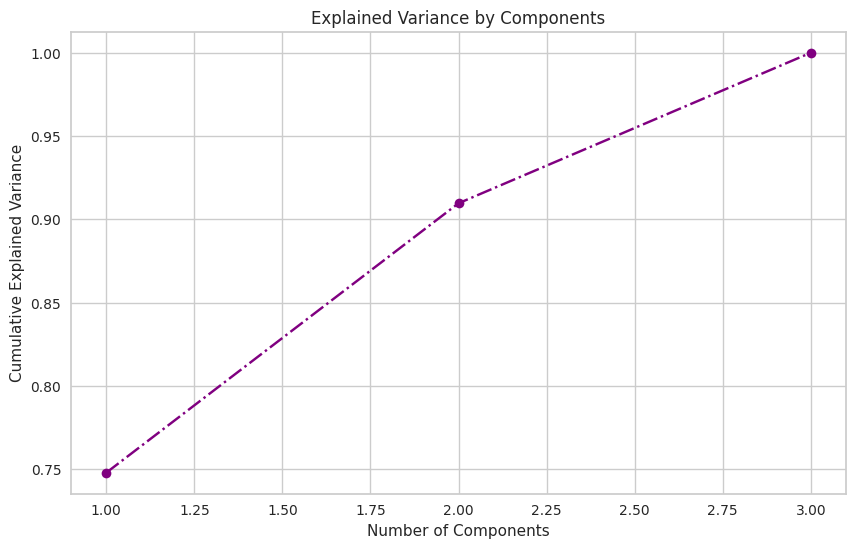

In [41]:
# Plotting the explained variance by components to get number of components.
plt.figure(figsize = (10,6))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "dashdot",color="purple")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

#### Graph shows that if we limit number of Principal Components to 2 (i.e PC1 and PC2) then we would be able to explain over 90% of varaince. Hence we limit number of principal components to 2.

In [42]:
pca = PCA(n_components=2)

pca.fit(RFM_log_df)

# Obtaining PCA scores.
scoresPCA = pca.transform(RFM_log_df)

#### K-means Clustering over PCA data

K-means clustering over PCA scores is being done to find number of customer groups after dimensionality reduction.

In [43]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "max_iter":250, "random_state":50}

inertia = []
silhouette_coefficient = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)    # open dictionary
    kmeans.fit(scoresPCA)
    inertia.append(kmeans.inertia_)
for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init=100)
    kmeans.fit(RFM_log_df)
    clusters = kmeans.predict(RFM_log_df)
    silhouette_avg = silhouette_score(RFM_log_df, clusters)
    silhouette_coefficient.append(silhouette_avg)
    print("For num of clusters =", k, "The average silhouette_score is :", silhouette_avg)

For num of clusters = 2 The average silhouette_score is : 0.40092167525547445
For num of clusters = 3 The average silhouette_score is : 0.30757187025550664
For num of clusters = 4 The average silhouette_score is : 0.2958869324299667
For num of clusters = 5 The average silhouette_score is : 0.2864083625726692
For num of clusters = 6 The average silhouette_score is : 0.2828818527791192
For num of clusters = 7 The average silhouette_score is : 0.26793064907068115
For num of clusters = 8 The average silhouette_score is : 0.255679506451047
For num of clusters = 9 The average silhouette_score is : 0.26269793840397637
For num of clusters = 10 The average silhouette_score is : 0.25855206773304484


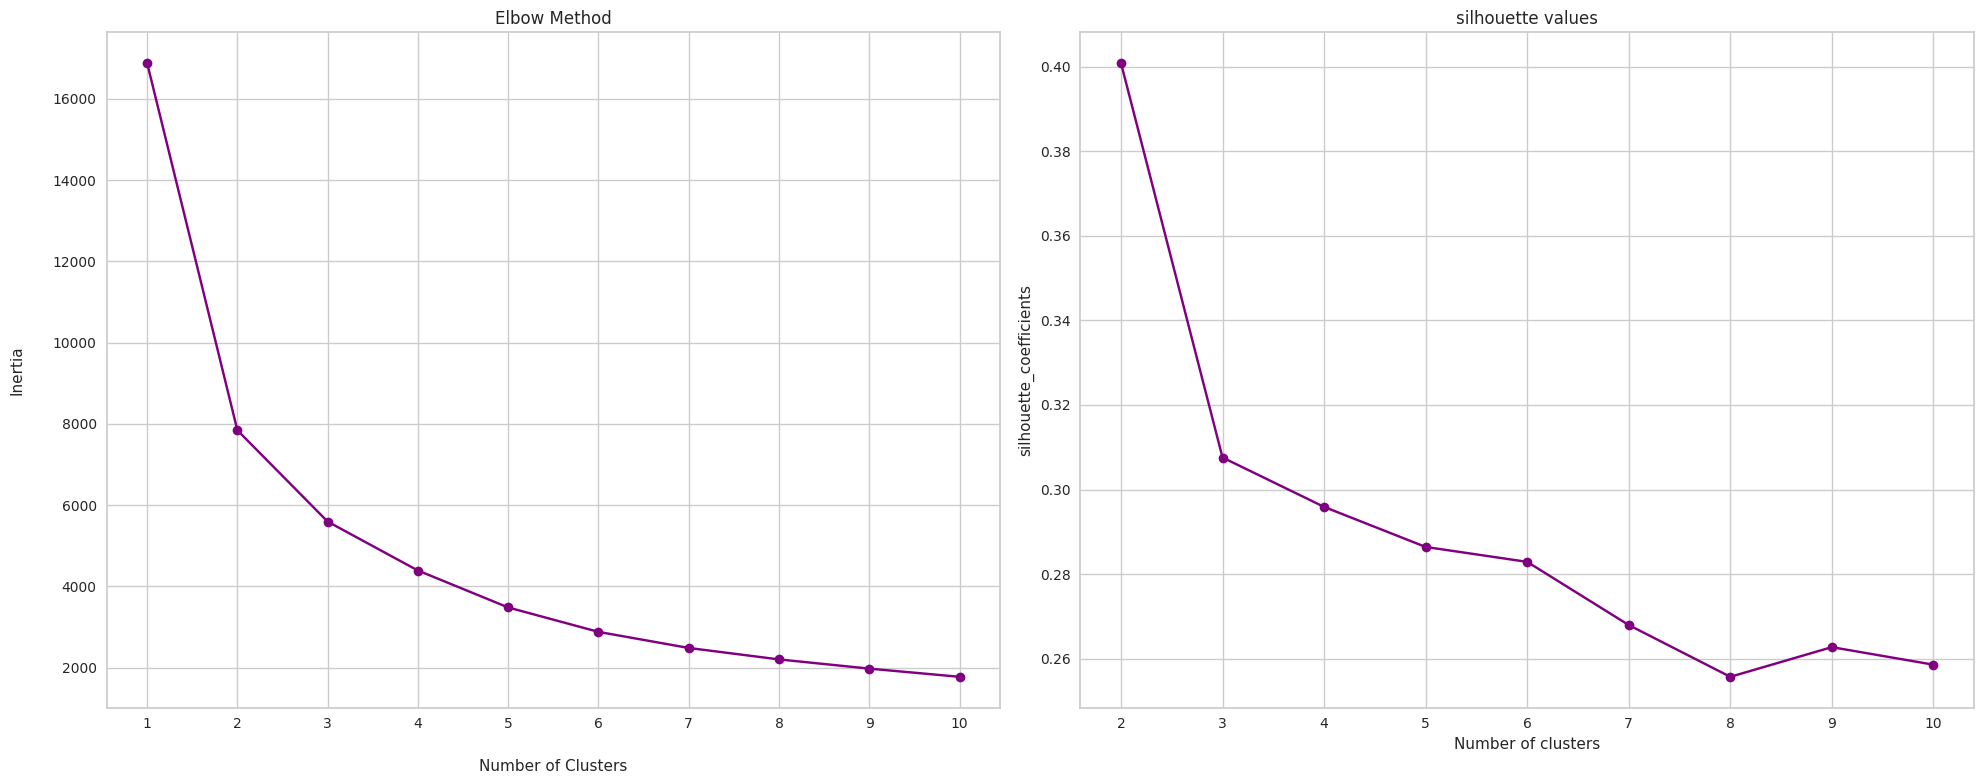

In [44]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].plot(range(1,11), inertia,color='purple',marker='o',label='Elbow Method')
ax[0].set_xticks(range(1,11))
ax[0].set_xlabel("Number of Clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")


ax[1].plot(range(2,11), silhouette_coefficient,color='purple',marker='o',label='silhouette coefficients')
ax[1].set_xticks(range(2,11))
ax[1].set_title("silhouette values")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("silhouette_coefficients")
plt.tight_layout();

#### From elbow graph and Silhoutte graph it can be concluded that the optimal number of cluster for this analysis is 2. There are 2 major groups of customers based on their RFM behaviour.

In [45]:
# Clustering PCA scores into 2 clusters
kmeans = KMeans(init='k-means++', n_clusters = 2, n_init=100)
kmeans.fit(scoresPCA)

KMeans(n_clusters=2, n_init=100)

In [46]:
PCA_Kmeans_df = pd.concat([RFM_log_df.reset_index(drop=True),pd.DataFrame(scoresPCA)],axis=1)
PCA_Kmeans_df.columns.values[-2:] = ["PC1","PC2"]
PCA_Kmeans_df["PCALabel"] = kmeans.labels_

In [47]:
PCA_Kmeans_df = pd.concat([PCA_Kmeans_df,rt_st_RFM_df['Monetary']],axis=1)

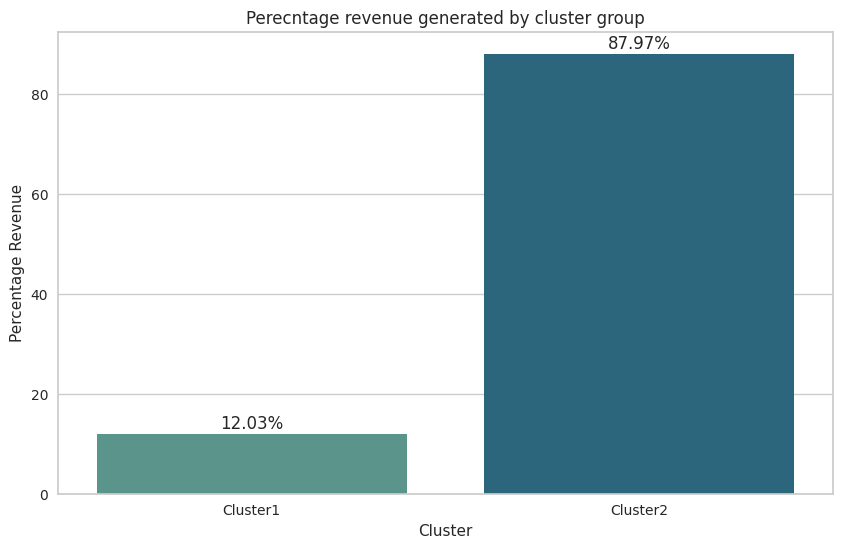

In [48]:
revenue_class_df = PCA_Kmeans_df.groupby('PCALabel')['Monetary'].sum().reset_index()
revenue_class_df['percentage'] = round((revenue_class_df['Monetary']/revenue_class_df['Monetary'].sum())*100,2)
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_class_df,x='PCALabel',y='percentage',palette='crest')
plt.xticks(ticks=[0,1],labels=['Cluster1','Cluster2'])
plt.xlabel('Cluster')
plt.ylabel('Percentage Revenue')
plt.title('Perecntage revenue generated by cluster group')
# Bar graph with data labels
for i, value in enumerate(revenue_class_df['percentage']):
    plt.text(i, value + 1, f'{value}%', ha='center')

#### Clustering yields two customer groups, with Cluster Group 2 contributing approximately 87.97% of the total revenue. These customers are loyal customers.These customers are deemed crucial, and offering tailored loyalty incentives is recommended to ensure their retention. In contrast, Cluster Group 1 generates a modest 12.03% of the revenue.There customers are infrequent customers.